In [3]:
import numpy as np
import pandas as pd
import datetime
import calendar
import seaborn as sns
from operator import attrgetter
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib.pyplot import figure

In [4]:
#  таблица с уникальными идентификаторами пользователей

# customer_id — позаказный идентификатор пользователя

# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

# customer_zip_code_prefix —  почтовый индекс пользователя

# customer_city —  город доставки пользователя

# customer_state —  штат доставки пользователя
url1 = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
customers = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url1}')

HTTPError: HTTP Error 404: Not Found

In [ ]:
# посмотрим таблицу
customers

In [4]:
#  таблица заказов

# Уникальные статусы заказов в таблице olist_orders_dataset:

# order_id —  уникальный идентификатор заказа (номер чека)

# customer_id —  позаказный идентификатор пользователя

# order_status —  статус заказа

# order_purchase_timestamp —  время создания заказа

# order_approved_at —  время подтверждения оплаты заказа

# order_delivered_carrier_date —  время передачи заказа в логистическую службу

# order_delivered_customer_date —  время доставки заказа

# order_estimated_delivery_date —  обещанная дата доставки
url2 = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
orders = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url2}', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_customer_date'])

In [5]:
# посмотрим таблицу
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
# товарные позиции, входящие в заказы

# order_id —  уникальный идентификатор заказа (номер чека)

# order_item_id —  идентификатор товара внутри одного заказа

# product_id —  ид товара (аналог штрихкода)

# seller_id — ид производителя товара

# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

# price —  цена за единицу товара

# freight_value —  вес товара
url3 = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'
items = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url3}')

In [2]:
# посмотрим таблицу
items

NameError: name 'items' is not defined

<span style="color:blue"> 1. Сколько у нас пользователей, которые совершили покупку только один раз?



ПОКУПКА 1) приобретение чего-либо за деньги; 2) купленная вещь. Покупка (purchase，购买)-одна из стадий в процессе принятия решений о покупке, когда потребитель приобретает товар или осуществляет его замену. 

In [8]:
# посмотрим какие order_status есть. 
# так же в таблице есть колонка - order_approved_at - подтверждение оплаты - надо посмотреть какие статусы есть 
# и где нулевые значения. Исходя из этого можно скорректировать статусы для фильтра
# и проверим есть ли нулевые значения во всей таблице
# и посчитаем количество заказов по статусам за весь период



In [9]:
orders.groupby(['order_status']).agg({'order_id':'count'})
# количество заказов по статусам
# order_id здесь - количество заказов

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


In [10]:
# смотрю количество не нулевых строк
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB
None


In [11]:
orders.isnull().sum()
# сколько отсутсвует значений в каких столбцах
# 160 значений отсутствуюет в подтверждении оплаты - order_approved_at - проверим, какие там статусы

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
# создаю новую колонку, где нулевые значения - 0, а есть есть значение то 1
orders['order_approved_at_NaN'] = np.where(orders['order_approved_at'].isnull(), 0,1)

In [13]:
orders.query('order_approved_at_NaN == 0').groupby(['order_status']).agg({'order_id':'count'})

,order_id
order_status,
canceled,141
created,5
delivered,14


In [14]:
# странно что стоит статус delivered, при этом отсутствует подтверждение оплаты 
#  хочу посмотреть что собой представляют подобные данные

In [15]:
orders.loc[(orders.order_approved_at_NaN == 0) & (orders.order_status == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_NaN
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,0
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,0
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,0
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,0
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,0
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00,0
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00,0
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00,0
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00,0
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00,0


In [16]:
# заказ был принят и доставлен, но при этом нет данных о времени оплаты. 
# Есть предположение, что могли расплатиться наличными и не внесли данные в таблицу
# или это ошибка и эти данные надо удалить 
# из всех таблиц можно уточнить только цену товаров в чеке и пользователей, это не поможет нам распознать в чем дело
# для уточнения надо связываться с Василием и с бухгалтерией - была ли оплата и исправлять данные

In [17]:
# будем считать покупку - статус после оплаты товара - delivered, processing, shipped и включу статус invoiced
#  ТАК КАК со статусом invoiced НЕТ нулевых значений в дате подтверждении оплаты (и во всех стоит обещанная дата доставки)
# следовательно invoiced —  выставлен счёт и оплачен -  так как стоит время в order_approved_at — время подтверждения оплаты заказа


In [18]:
orders.query('order_status == "invoiced"').isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
order_approved_at_NaN              0
dtype: int64

In [19]:
# хочу посмотреть таблицу пользователей и посчитать количество позаказных идентификаторов пользователя на каждого уникального

customers.groupby('customer_unique_id').agg({'customer_id':'count'}).sort_values('customer_id', ascending = False)


,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1
5656eb169546146caeab56c3ffc3d268,1


In [20]:
# обьединю таблицы по customer_id, добавив customer_unique_id
orders = orders.merge(customers[['customer_unique_id','customer_id']], on='customer_id')

In [21]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_NaN,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,5097a5312c8b157bb7be58ae360ef43c


In [22]:
# делаю выборку по статусам, группирую по уникальному id пользователя, считаю количество заказов,делаю выборку равную 1
# order_id здесь - количество заказов
orders.query('order_status == ["delivered", "processing", "shipped", "invoiced"]') \
      .groupby('customer_unique_id') \
      .agg({'order_status':'count'}).query('order_status == 1')

,order_status
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


<span style="color:purple">  
    >>>>>>>>>>    92 097 пользователей, которые совершили покупку только один раз, учитывая выбранные статусы

<span style="color:blue">  2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [23]:

orders.order_delivered_customer_date = orders.order_delivered_customer_date.dt.to_period('M') 
# колонку с датой доставки преобразуем в период месяц-год



In [24]:

orders.order_purchase_timestamp = orders.order_purchase_timestamp.dt.to_period('M') 

# колонку с датой покупки заказа в месяц-год

In [25]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_NaN,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10,2017-10-18 00:00:00,1,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08,2018-08-13 00:00:00,1,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08,2018-09-04 00:00:00,1,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12,2017-12-15 00:00:00,1,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02,2018-02-26 00:00:00,1,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03,2017-03-28 00:00:00,1,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02,2018-03-02 00:00:00,1,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09,2017-09-27 00:00:00,1,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01,2018-02-15 00:00:00,1,5097a5312c8b157bb7be58ae360ef43c


In [26]:
# Посчитаем всего заказов в месяц по месяцам (учтем сначала дату создания заказза)
# order_id здесь - количество заказов

dfall = orders.groupby('order_purchase_timestamp').agg({'order_id':'count'})
dfall

,order_id
order_purchase_timestamp,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


In [27]:
orders['order_delivered_customer_date_Nan'] = np.where(orders['order_delivered_customer_date'].isnull(), 0,1)
# отметим позиции 0 те, которых нет в времени доставки товара., создав новую колонку

In [28]:
df_not_delivered = orders.query('order_delivered_customer_date_Nan == 0').groupby('order_purchase_timestamp').agg({'order_id':'count'})
df_not_delivered
# подсчет отсутствующих данных по месяцам исходя из новой колонки, где ноль - отсутствует дата доставки
# order_id здесь - количество заказов

,order_id
order_purchase_timestamp,
2016-09,3
2016-10,54
2017-01,50
2017-02,127
2017-03,136
2017-04,101
2017-05,155
2017-06,110
2017-07,154


In [29]:
cred_po_mec = df_not_delivered/dfall
# делю количество отствующей доставки по времени на общее количество заказов


In [30]:
cred_po_mec.mean().round(2)


order_id    0.15
dtype: float64

 <span style="color:purple"> 
   В среднем около 15% заказов в месяц не доставляются
    
 небольшая чать из-за того, что не одобрен заказ (отсутствует время order_approved_at) 
    
 часть - отсутствует время передачи заказа в логистическую службу (отсутствует order_delivered_carrier_date)
  и часть  - отсутствует время доставки заказа (order_delivered_customer_date)

    


 <span style="color:purple"> 
    так же можно еще раз посмотреть какие order_status есть и какие из них соответствуют - отсутствию даты доставки клиенту

    order_id здесь - количество заказов


In [31]:
orders.query('order_delivered_customer_date_Nan == 0').groupby('order_status').agg({'order_id':'count'})

,order_id
order_status,
approved,2
canceled,619
created,5
delivered,8
invoiced,314
processing,301
shipped,1107
unavailable,609


In [32]:
# ну и посчитать среднее по причин
orders.query('order_delivered_customer_date_Nan == 0').groupby(['order_status','order_purchase_timestamp'] ).agg({'order_id':'count'})\
                                                     .groupby('order_status').agg({'order_id': 'mean'}).round()

,order_id
order_status,
approved,1.0
canceled,26.0
created,2.0
delivered,2.0
invoiced,15.0
processing,16.0
shipped,48.0
unavailable,29.0


In [33]:
# п.с. # странно, нет даты доставки, но есть статус что доставлено. Возможно был самовывоз. но это всего 8 заказов

In [34]:
orders.query('order_delivered_customer_date_Nan == 0 & order_status == "delivered"') 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved_at_NaN,customer_unique_id,order_delivered_customer_date_Nan
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18 00:00:00,1,13467e882eb3a701826435ee4424f2bd,0
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16 00:00:00,1,2f17c5b324ad603491521b279a9ff4de,0
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30 00:00:00,1,1bd06a0c0df8b23dacfd3725d2dc0bb9,0
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30 00:00:00,1,3bc508d482a402715be4d5cf4020cc81,0
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24 00:00:00,1,ebf7e0d43a78c81991a4c59c145c75db,0
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05,2017-05-25 23:30:16,NaN,NaT,2017-06-23 00:00:00,1,d77cf4be2654aa70ef150f8bfec076a6,0
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26 00:00:00,1,cce5e8188bf42ffb3bb5b18ff58f5965,0
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19 00:00:00,1,175378436e2978be55b8f4316bce4811,0


<span style="color:purple"> 

Так же исходя из таблицы с order_status и  количеством отсутствия по категориям можно сделать вывод что много заказов unavailable - недоступно (может нет товара на складе) -609
    
и много canceled - отменено - 619  
    
 и shipped - означает что в процессе доставки клиенту - 1107


<span style="color:blue"> 3. По каждому товару определить, в какой день недели товар чаще всего покупается

In [35]:
orders = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url2}', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_customer_date'])

In [36]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [37]:
# посмотрим какие order_status. Вообще, хорошо, было бы уточнить-какой статус является оплаченным для товара
# буду предполагать, что покупка - это опять же invoiced,processing,shipped,delivered, как ранее объяснила
# (потому что все invoiced - оплачены)
# order_id здесь - количество заказов
orders.groupby(['order_status']).agg({'order_id':'count'})

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


In [38]:
# добавим в orders из таблицы items - product_id - ид товара (аналог штрихкода)
orders = orders.merge(items[['product_id','order_id']], on='order_id')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e
...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,f1d4ce8c6dd66c47bbaa8c6781c2a923
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,b80910977a37536adeddd63663f916ad
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,d1c427060a0f73f6b889a5c7c61f2ac4
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,d1c427060a0f73f6b889a5c7c61f2ac4


In [39]:
# добавили колонку с названиями дней недели

orders['day_of_week'] = orders.order_approved_at.dt.day_name()

In [40]:
# выборка по статусам. группирую по id продукта и по дню недели, считаю количество заказов по неделям для каждого продукта
# order_id здесь - количество заказов
orders_week = orders.query('order_status ==["invoiced", "processing", "shipped", "delivered"]').groupby(['product_id','day_of_week'],as_index=False).agg({'order_id':'count'})
orders_week

,product_id,day_of_week,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
60786,fff9553ac224cec9d15d49f5a263411f,Saturday,1
60787,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60788,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
60789,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3


<span style="color:purple"> 
    > Два варинта  - с повторяющимся количеством товара в день недели и без.
В данной группе (ниже) оставили одинаковые повторяющиеся product_id c одинаковым количеством - 42343  товаров.

    Ну чаще всего это громко сказано, потому что большинство куплено 1 раз.
Можно просмотреть последние 50 по убыванию и обратить внимание, что Thursday и Wednesday встречаются довольно часто
 order_id здесь - количество заказов


In [41]:
df = orders_week.groupby(['product_id'])['order_id'].transform(max) == orders_week['order_id']
orders_week[df].sort_values('order_id',ascending = False)

,product_id,day_of_week,order_id
40850,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20036,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15844,422879e10f46682990de24d770e7f83d,Tuesday,89
36363,99a4788cb24856965c36a24e339b6058,Tuesday,82
12996,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23246,6157bc1be1e8edc531fc0c94dddf5ac9,Sunday,1
23245,6157bc1be1e8edc531fc0c94dddf5ac9,Friday,1
23244,6156141755987eaf93bc9b959601db45,Thursday,1
23236,614dd74b96d1a51792de2d9a3475145a,Thursday,1


<span style="color:purple">  
>>>>>>    здесь (ниже) удалили дубликаты, оставив первый максимум по order_id - 32724 товар
    
 order_id здесь - количество заказов
    


In [42]:
orders_week.sort_values('order_id', ascending=False).drop_duplicates('product_id').sort_values('order_id',ascending = False)

,product_id,day_of_week,order_id
40850,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20036,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15844,422879e10f46682990de24d770e7f83d,Tuesday,89
36363,99a4788cb24856965c36a24e339b6058,Tuesday,82
12996,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
45209,bebcffeb66bcb8af8112dba655b1c1c3,Sunday,1
45208,bebbcfea18211f83db416d354127179c,Saturday,1
45202,beaf3fee881a18c9b8f551d4fc88f90b,Thursday,1
45201,bead7727f31b655a7f9a92a6a58e1b4d,Wednesday,1


<span style="color:blue"> 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель.
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. </span>

In [43]:
orders = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url2}', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_customer_date'])
# обьединю таблицы по customer_id, добавив customer_unique_id
orders = orders.merge(customers[['customer_unique_id','customer_id']], on='customer_id')

In [44]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c


In [45]:
# определим количество недель в месяце, в котором был сделан заказ
orders['numberweek'] = orders['order_purchase_timestamp'].dt.days_in_month / 7
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,numberweek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,4.000000
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,4.428571
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,4.000000
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,4.428571
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,4.428571


In [46]:
# возвращаю период-месяцы для расчета общего колчества заказов по месяцам
orders.order_purchase_timestamp = orders.order_purchase_timestamp.dt.to_period('M') 


Будем считать что полноценные покупки (произошла оплата) - это те, которые имеют статус ["invoiced", "processing", "shipped", "delivered"], т.к. исходя из предыдущих заданий




Оrder_id здесь - количество заказов

In [47]:
orders_customers_week = orders.query('order_status == ["invoiced", "processing", "shipped", "delivered"]').groupby(['customer_unique_id','order_purchase_timestamp','numberweek']) \
                                           .agg({'order_id':'count'}).reset_index()
orders_customers_week

,customer_unique_id,order_purchase_timestamp,numberweek,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1
...,...,...,...,...
96857,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1
96858,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1
96859,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1
96860,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1


Находим среднее значение в неделю по уникальному пользователю. Среднее находится путем деления количества заказов в месяц на количество недель в месяце
order_id здесь - количество заказов


In [48]:
orders_customers_week['koli4estvo_v_nedelu'] = orders_customers_week['order_id']/orders_customers_week['numberweek']
orders_customers_week

,customer_unique_id,order_purchase_timestamp,numberweek,order_id,koli4estvo_v_nedelu
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1,0.233333
...,...,...,...,...,...
96857,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1,0.233333
96858,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1,0.225806
96859,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1,0.250000
96860,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1,0.225806


In [49]:
orders_customers_week.sort_values('koli4estvo_v_nedelu', ascending = False)

,customer_unique_id,order_purchase_timestamp,numberweek,order_id,koli4estvo_v_nedelu
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,4.428571,6,1.354839
23650,3e43e6105506432c953e165fb2acf44c,2018-02,4.000000,4,1.000000
61444,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4.000000,4,1.000000
68549,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4.000000,4,1.000000
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4.285714,4,0.933333
...,...,...,...,...,...
40496,6ac3c7ce164d85523c71a91afac8f906,2018-01,4.428571,1,0.225806
40497,6ac4c2b8476a9b14dc824e2cda804dfc,2018-08,4.428571,1,0.225806
40498,6ac52814155aa5b8da64bb30a14c6b3b,2018-05,4.428571,1,0.225806
40499,6ac5a10275f1f5885f87a85356c980b9,2018-03,4.428571,1,0.225806


In [50]:
# ниже просто интересно сколько в среднем в неделю покупают относительно всех пользователей
orders_customers_week.koli4estvo_v_nedelu.mean()

0.23336320067843408

 <span style="color:blue"> 5. Используя pandas, проведи когортный анализ пользователей.
    В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. </span>


Retention rate — это коэффициент удержания пользователей. 
Он показывает, сколько клиентов возвращаются за повторной покупкой за определённый период после первой покупки.
то есть надо найти период с наибольшим количеством вернувшихся пользователей

In [51]:
orders = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url2}', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_customer_date'])

In [52]:
customers = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url1}')

In [53]:
# добавим колонки уникального пользователя
orders = orders.merge(customers[['customer_unique_id','customer_id']], on='customer_id')

In [54]:
# добавим колонки с ценой и штрихкодом товара,-вычислить стоимость покупки уникального пользователя(для диаграммы)
orders = orders.merge(items[['order_id','product_id', 'price']], on='order_id')

In [55]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,205.99
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


In [56]:
# возвращаю период-месяцы в новую колонку 
orders['order_approved_at_period']  = orders.order_approved_at.dt.to_period('M') 


In [57]:
# посмотрю изменение покупок товаров за разные периоды(просуммирую стоимости разных товаров по месяцам)
# но я считаю, что товар куплен, если его статус - order_status - ["invoiced", "processing", "shipped", "delivered"]



h = orders.query('order_status == ["invoiced", "processing", "shipped", "delivered"]').groupby('order_approved_at_period',as_index=False).agg({'price':'sum'}).sort_values('order_approved_at_period')
h

,order_approved_at_period,price
0,2016-09,134.97
1,2016-10,44580.19
2,2016-12,10.90
3,2017-01,114646.11
4,2017-02,245057.71
5,2017-03,364608.58
6,2017-04,351411.27
7,2017-05,504527.15
8,2017-06,433858.69
9,2017-07,487021.88


<AxesSubplot:xlabel='order_approved_at_period', ylabel='price'>

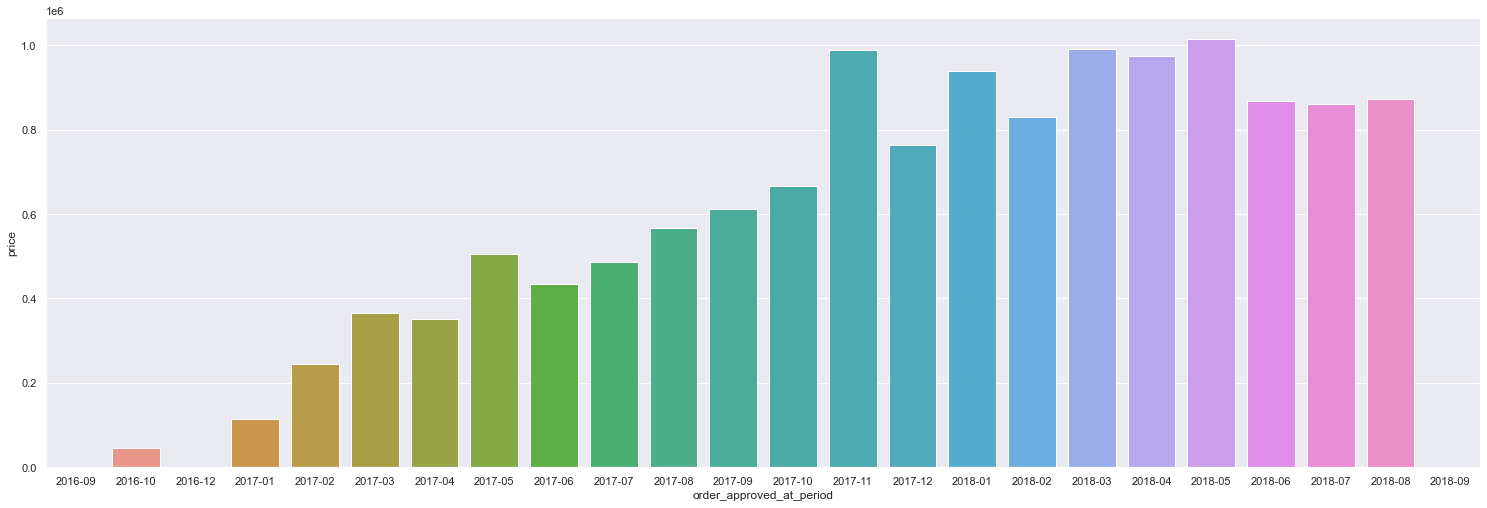

In [58]:
# так как не указан год - единственные данные,которые охватывают период январь-декабрь, это 2017 год


sns.set(rc={'figure.figsize':(25.7,8.27)})
sns.barplot(x='order_approved_at_period', y='price',  data=h)

In [59]:
# Чтобы построить когорты, нам нужно сгруппировать клиентов по дате их первой покупки. 

In [60]:
# найдем первую покупку каждого пользователя

In [61]:
# Даты первых покупок для каждого пользователя
first_orders = orders.groupby('customer_unique_id').agg({'order_approved_at': 'min'})
first_orders = first_orders.rename(columns={'order_approved_at': 'first_orders'})
first_orders

,first_orders
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20
ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44


In [62]:
# когортами будем считать людей, сделавших первую покупку в тот или иной день.


In [63]:
# сначала добавим дату первой покупки пользователей в таблицу с заказами, затем сгруппируем по датам первой покупки 


In [64]:
orders_merged = orders.merge(first_orders, how='inner', left_on='customer_unique_id', right_index=True)
orders_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,product_id,price,order_approved_at_period,first_orders
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,29.99,2017-10,2017-09-04 11:43:25
70264,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,9abb00920aae319ef9eba674b7d2e6ff,35.39,2017-09,2017-09-04 11:43:25
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,159.90,2018-08,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11,2017-11-18 19:45:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,2018-02,2018-02-06 13:10:37
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,205.99,2017-08,2017-08-27 15:04:16
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2018-01,2018-01-08 21:36:21
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2018-01,2018-01-08 21:36:21


In [65]:
# приведем даты к месяцам
orders_merged.first_orders  = orders_merged.first_orders.dt.to_period('m') 
orders_merged.order_approved_at  = orders_merged.order_approved_at.dt.to_period('M')

In [66]:
orders_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,product_id,price,order_approved_at_period,first_orders
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,29.99,2017-10,2017-09
70264,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,9abb00920aae319ef9eba674b7d2e6ff,35.39,2017-09,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,159.90,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017-11,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,2018-02,2018-02
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,205.99,2017-08,2017-08
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2018-01,2018-01
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2018-01,2018-01


In [67]:
# отфильтруем данные за нужный период, и посчитаем количество клиентов
# период первой покупки с января по декабрь

orders_merged = orders_merged.query('order_status == ["invoiced","processing", "shipped", "delivered"]') \
    .query("'2017-01' <= first_orders <= '2017-12'") \
    .groupby(['first_orders', 'order_approved_at'], as_index=False) \
    .agg({"customer_unique_id": "nunique"})

In [68]:
orders_merged

,first_orders,order_approved_at,customer_unique_id
0,2017-01,2017-01,716
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
166,2017-12,2018-04,13
167,2017-12,2018-05,11
168,2017-12,2018-06,9
169,2017-12,2018-07,1


In [69]:
orders_merged['period'] = (orders_merged.order_approved_at - orders_merged.first_orders)
orders_merged['period'] = orders_merged['period'].apply(attrgetter("n"))+1
#вычитаем дату первой покупки из даты покупок

In [70]:
orders_merged = orders_merged.pivot(index='first_orders', columns = 'period', values = 'customer_unique_id')

In [71]:
orders_merged

period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
first_orders,,,,,,,,,,,,,,,,,,,
2017-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1673.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2300.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN
2017-05,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN,NaN
2017-06,3110.0,15.0,11.0,12.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3775.0,20.0,13.0,7.0,13.0,7.0,12.0,4.0,7.0,9.0,8.0,11.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4153.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4096.0,27.0,20.0,14.0,17.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# показатели за 1 месяц
cohort_sizes = orders_merged.iloc[:,0]
cohort_sizes

first_orders
2017-01     716.0
2017-02    1673.0
2017-03    2580.0
2017-04    2300.0
2017-05    3543.0
2017-06    3110.0
2017-07    3775.0
2017-08    4153.0
2017-09    4096.0
2017-10    4360.0
2017-11    7053.0
2017-12    5590.0
Freq: M, Name: 1, dtype: float64

In [73]:
# деление всех периодов на показатель 1 периода
retention = orders_merged.divide(cohort_sizes, axis=0)
retention

period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
first_orders,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,NaN,0.002793,0.002793,0.006983,0.004190,0.001397,0.001397,0.002793,0.004190,0.001397
2017-02,1.0,0.002391,0.002391,0.001793,0.004184,0.001195,0.002391,0.001793,0.000598,0.001793,0.001195,0.002989,0.001195,0.001793,0.001195,0.000598,0.000598,0.002391,NaN
2017-03,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,0.003876,0.001163,0.002326,0.001163,0.001550,0.002326,0.000775,0.001550,NaN
2017-04,1.0,0.006087,0.002174,0.001739,0.003043,0.002609,0.003478,0.002609,0.003478,0.001739,0.002174,0.000870,0.000870,0.000435,0.000870,0.000870,0.001739,NaN,NaN
2017-05,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,0.002540,0.002540,0.002822,0.003387,0.001976,0.000564,0.001976,0.002540,NaN,NaN,NaN
2017-06,1.0,0.004823,0.003537,0.003859,0.002572,0.003537,0.003859,0.002251,0.001286,0.002251,0.003215,0.003537,0.001608,0.001286,0.001929,NaN,NaN,NaN,NaN
2017-07,1.0,0.005298,0.003444,0.001854,0.003444,0.001854,0.003179,0.001060,0.001854,0.002384,0.002119,0.002914,0.001325,0.002649,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006742,0.003612,0.002649,0.003853,0.005297,0.002649,0.002649,0.001204,0.001686,0.002408,0.001686,0.001204,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006592,0.004883,0.003418,0.004150,0.002686,0.002197,0.002197,0.003174,0.001709,0.002686,0.000732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:

retentions = round(retention*100,2)
retentions

period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
first_orders,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.56,0.28,0.14,0.42,0.14,0.42,0.14,0.14,NaN,0.28,0.28,0.70,0.42,0.14,0.14,0.28,0.42,0.14
2017-02,100.0,0.24,0.24,0.18,0.42,0.12,0.24,0.18,0.06,0.18,0.12,0.30,0.12,0.18,0.12,0.06,0.06,0.24,NaN
2017-03,100.0,0.50,0.35,0.35,0.35,0.16,0.16,0.31,0.31,0.12,0.39,0.12,0.23,0.12,0.16,0.23,0.08,0.16,NaN
2017-04,100.0,0.61,0.22,0.17,0.30,0.26,0.35,0.26,0.35,0.17,0.22,0.09,0.09,0.04,0.09,0.09,0.17,NaN,NaN
2017-05,100.0,0.54,0.48,0.40,0.31,0.34,0.42,0.14,0.25,0.25,0.28,0.34,0.20,0.06,0.20,0.25,NaN,NaN,NaN
2017-06,100.0,0.48,0.35,0.39,0.26,0.35,0.39,0.23,0.13,0.23,0.32,0.35,0.16,0.13,0.19,NaN,NaN,NaN,NaN
2017-07,100.0,0.53,0.34,0.19,0.34,0.19,0.32,0.11,0.19,0.24,0.21,0.29,0.13,0.26,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.67,0.36,0.26,0.39,0.53,0.26,0.26,0.12,0.17,0.24,0.17,0.12,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.66,0.49,0.34,0.42,0.27,0.22,0.22,0.32,0.17,0.27,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 >>>  <span style="color:purple">  находим самый высокий retention на 3й месяц - 
Period('2017-09', 'M')


In [75]:

retentions[3].idxmax()

Period('2017-09', 'M')

In [76]:
# попробуем построить тепловую карту
# с подобными показателями она, конечно, не будет очень эффектной

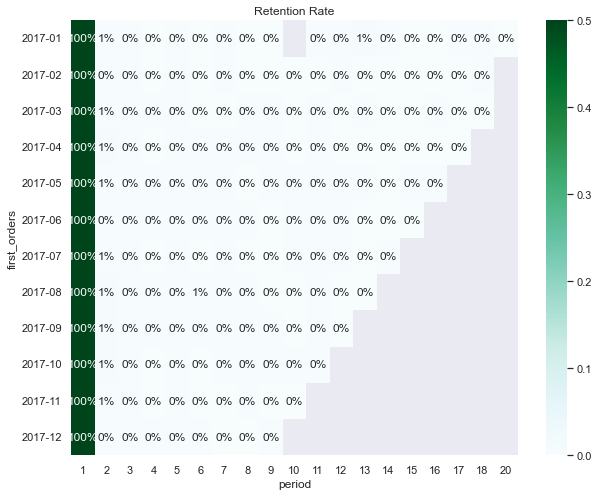

In [77]:
plt.figure(figsize=(10,8))
plt.title("Retention Rate")
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="BuGn")
plt.show()

 <span style="color:blue"> 
    6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [79]:
# вызываю таблицы

In [78]:
orders = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url2}', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_customer_date'])

In [79]:
items = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url3}')

In [80]:
customers = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url1}')

In [81]:
# R - время от последней покупки пользователя до текущей даты
# F - суммарное количество покупок у пользователя за всё время
# M - сумма покупок за всё время.

In [82]:
# добавим колонки уникального пользователя
orders = orders.merge(customers[['customer_unique_id','customer_id']], on='customer_id')

In [83]:
# добавим колонки с ценой и штрихкодом товара
orders = orders.merge(items[['order_id','product_id', 'price']], on='order_id')

In [84]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,205.99
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


In [85]:
print('Orders from {} to {}'.format(orders['order_approved_at'].min(),
                                    orders['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


In [86]:
# рассчитываю общую стоимость каждого заказа
orders.groupby('order_id').agg({'price':'sum'})

,price
order_id,
00010242fe8c5a6d1ba2dd792cb16214,58.90
00018f77f2f0320c557190d7a144bdd3,239.90
000229ec398224ef6ca0657da4fc703e,199.00
00024acbcdf0a6daa1e931b038114c75,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...
fffc94f6ce00a00581880bf54a75a037,299.99
fffcd46ef2263f404302a634eb57f7eb,350.00
fffce4705a9662cd70adb13d4a31832d,99.90


In [87]:
# M сумма покупок за всё время
ordersM = orders.groupby(['customer_unique_id']).agg({'price': lambda x: x.sum()}).reset_index()
ordersM.head()

,customer_unique_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [88]:
# F - суммарное количество покупок у пользователя за всё время
ordersF = orders.groupby(['customer_unique_id']).agg({'product_id': lambda x: len(x)}).reset_index()
ordersF.head()

,customer_unique_id,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [89]:
# сегодняшняя дата
NOW = orders.order_approved_at.max() + timedelta(days=1)
NOW 

Timestamp('2018-09-04 17:40:06')

In [90]:
#  добавить столбец с количеством дней между покупкой и сейчас. 
# Чтобы найти значения Recency, нужно будет найти минимум этого столбца для каждого клиента.
orders['DaysSinceOrder'] = orders['order_approved_at'].apply(lambda x: (NOW - x).days)

In [91]:
rfm = orders \
    .groupby('customer_unique_id') \
    .agg({'DaysSinceOrder': lambda x: x.min(), 'product_id': lambda x: len(x), 'price': lambda x: x.sum()}) \
    .rename(columns={'DaysSinceOrder': 'R', 'product_id': 'F', 'price': 'M'})
rfm

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90
0000f46a3911fa3c0805444483337064,542.0,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99
0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452.0,2,1570.00
fffea47cd6d3cc0a88bd621562a9d061,267.0,1,64.89
ffff371b4d645b6ecea244b27531430a,574.0,1,89.90


In [92]:
#  используем метод квинтилей. получаем квинтили для каждого параметра.
quintiles = rfm[['R', 'F', 'M']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [93]:
# методы присвоения рангов от 1 до 5. Меньшее значение Recency лучше, тогда как более высокие значения Frequency и Monetary лучше.
# нужно написать два отдельных метода.

In [94]:
def r_score(x):
    if x <= quintiles['R'][.2]:
        return 5
    elif x <= quintiles['R'][.4]:
        return 4
    elif x <= quintiles['R'][.6]:
        return 3
    elif x <= quintiles['R'][.8]:
        return 2
    else:
        return 1


In [95]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [96]:
# оценки R, F и M каждого клиента.
rfm['R'] = rfm['R'].apply(lambda x: r_score(x))
rfm['F'] = rfm['F'].apply(lambda x: fm_score(x, 'F'))
rfm['M'] = rfm['M'].apply(lambda x: fm_score(x, 'M'))

In [97]:
# Наконец, оценки R, F и M в a.RFM Score
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [98]:
rfm.head()

,R,F,M,RFM Score
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,411
0000f46a3911fa3c0805444483337064,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,2,1,5,215


In [99]:
# можно распределить исходя из частоты покупок и давности (R и F) 
segt_map = {
    r'[1-2][1-2]': 'бездействие',
    r'[1-2][3-4]': 'в зоне риска',
    r'[1-2]5': 'можно потерять',
    r'3[1-2]': 'почти бездействие',
    r'33': 'внимание',
    r'[3-4][4-5]': 'лояльные покупатели',
    r'41': 'многообещающие',
    r'51': 'новые покупатели',
    r'[4-5][2-3]': 'потенциальные лояльные покупатели',
    r'5[4-5]': 'чемпионы'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,R,F,M,RFM Score,Segment
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,4,1,4,414,многообещающие
0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,411,многообещающие
0000f46a3911fa3c0805444483337064,1,1,2,112,бездействие
0000f6ccb0745a6a4b88665a16c9f078,2,1,1,211,бездействие
0004aac84e0df4da2b147fca70cf8255,2,1,5,215,бездействие
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,5,5,155,можно потерять
fffea47cd6d3cc0a88bd621562a9d061,3,1,2,312,почти бездействие
ffff371b4d645b6ecea244b27531430a,1,1,3,113,бездействие


In [100]:
# количество покупателей по категориям
rfm.groupby('Segment').count()

,R,F,M,RFM Score
Segment,,,,
бездействие,33370,33370,33370,33370
лояльные покупатели,4815,4815,4815,4815
многообещающие,16552,16552,16552,16552
можно потерять,4685,4685,4685,4685
новые покупатели,16819,16819,16819,16819
почти бездействие,16810,16810,16810,16810
чемпионы,2369,2369,2369,2369



Чемпионы - много, часто покупают
    
Лояльные покупатели - покупают регулярно
    
Потенциальные лояльные покупатели - недавние клиенты со средней частотой
    
Многообещающие - Недавние покупатели, но не потратили много.
    
Внимание - Доходность, частота и денежная стоимость выше среднего
    
Почти бездействие - Покупаемость и давность покупки ниде средней
    
В зоне риска - покупали часто, но давно
    
Можно потерять - Раньше покупали часто, но давно не возвращались
    
Бездействие - Последняя покупка была давно и малое количество заказов
    

In [101]:
rfm.query('Segment == "бездействие"')

,R,F,M,RFM Score,Segment
customer_unique_id,,,,,
0000f46a3911fa3c0805444483337064,1,1,2,112,бездействие
0000f6ccb0745a6a4b88665a16c9f078,2,1,1,211,бездействие
0004aac84e0df4da2b147fca70cf8255,2,1,5,215,бездействие
0005e1862207bf6ccc02e4228effd9a0,1,1,4,114,бездействие
0006fdc98a402fceb4eb0ee528f6a8d4,1,1,1,111,бездействие
...,...,...,...,...,...
fff3a9369e4b7102fab406a334a678c3,2,1,3,213,бездействие
fff699c184bcc967d62fa2c6171765f7,2,1,1,211,бездействие
fffa431dd3fcdefea4b1777d114144f2,2,1,2,212,бездействие


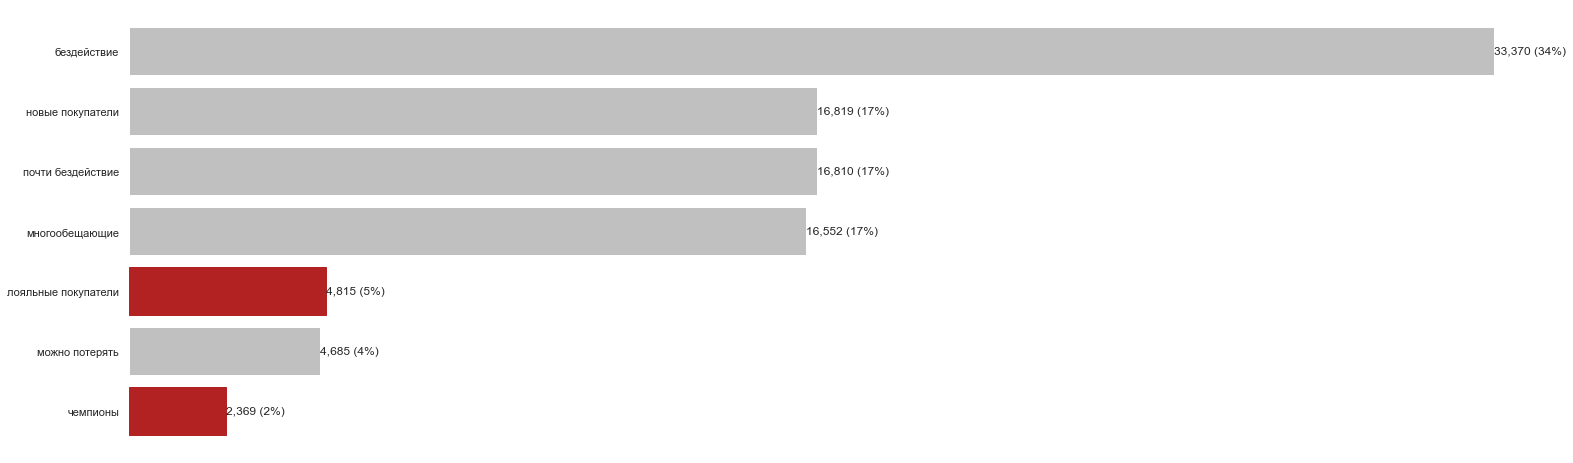

In [102]:

# можно построить диаграмму и посмотреть процентное соотношение каждого сегмента

segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['чемпионы', 'лояльные покупатели']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

<span style="color:purple">
    Из RFM можно выявить лучших покупателей - 155 - недавно покупали, часто покупают и много тратят, 
    а 511 - давно не покупали, мало покупают и малая стоимость покупок
    
    так же исходя из диаграммы частоты и давности покупок - можно определить процентное количество часто покупающих и как давно покупали
    к примеру около 34% покупателей практически бездействуют (R - 1-2 , F - 1-2 , M - 1-5)
    
    и 2% которые недавно покупали и часто покупают ( R - 5 , F - 4-5 , M - 1-5)
    
    
    
    
 R - время от последней покупки пользователя до текущей даты (1 - недавно покупали, 5 - давно)
    
 F - суммарное количество покупок у пользователя за всё время (1 - мало покупок, 5 - много)
    
 M - сумма покупок за всё время.(1-маленькая сумма покупок, 5 - потратил много денег)